# Samson Chibudu Nyiro - 1 April 2022
Overview 

Just like before, we have been tasked to understand electric car usage by solving for another research question. We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made. An example of claim to test would be "Is the number of Bluecars taken in area X different than in area Y? Is it greater in area X than in area Z? Etc”. The selected periods of interest be either weekdays or weekends but not a mix of both. You can also consider postal codes 75015 vs 75017 to some of the areas of interest. 

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
from scipy.stats import ttest_ind
# Importing anderson function form scipy 
from scipy.stats import anderson
# generate random integer values
from numpy.random import seed
from numpy.random import randint
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression

Loading of the Data Set

In [4]:
df = pd.read_csv('/Users/la/Documents/Python/IP_1_April_2022_Samson_Nyiro/autolib_daily_events_postal_code.csv', parse_dates = ['date'])
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,2018-01-01,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,2018-01-02,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,2018-01-03,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,2018-01-04,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,2018-01-05,1440,4,weekday,114,117,3,3,6,6,18,20


Checking the shape, Description and the data types of the Data set

In [5]:
# checking for the shape of the data set
df.shape

(16085, 13)

In [7]:
# Checking for missing values
# Checking for missing values in the dataset demographic data.
 
# Creating a function to check
def missing_values(data):
 
 # identifying the missing values from the demographic data dataset
 #
 miss = data.isnull().sum().sort_values(ascending = False)
 # finding the percentage of missing values
 percentage = (data.isnull().sum() / len(data)).sort_values(ascending = False)
 # storing  total missing values in percentage in dataframe
 #
 missing_data = pd.DataFrame({'Total' : miss, 'Percentage' : percentage})
 #if the percentage is 0, indicates no missing values hence removed
 #
 missing_data.drop(missing_data[missing_data['Percentage'] == 0].index, inplace = True)
 
 return missing_data
 
missing_values(df)


,Total,Percentage


In [8]:
# Checking for Duplicate Values

# occurrence based on all columns
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum


In [9]:
# Check for Data Types
df.dtypes

Postal code                        int64
date                      datetime64[ns]
n_daily_data_points                int64
dayOfWeek                          int64
day_type                          object
BlueCars_taken_sum                 int64
BlueCars_returned_sum              int64
Utilib_taken_sum                   int64
Utilib_returned_sum                int64
Utilib_14_taken_sum                int64
Utilib_14_returned_sum             int64
Slots_freed_sum                    int64
Slots_taken_sum                    int64
dtype: object

In [11]:
# Check descriptive analysis
df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


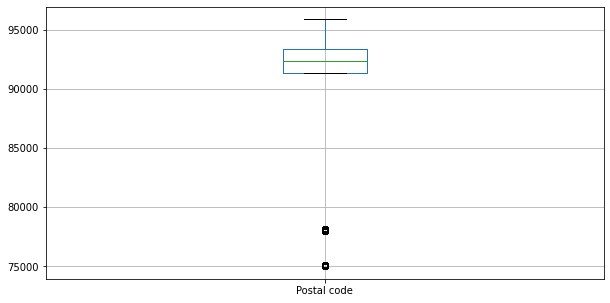

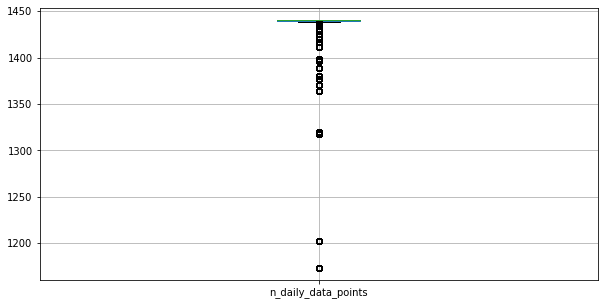

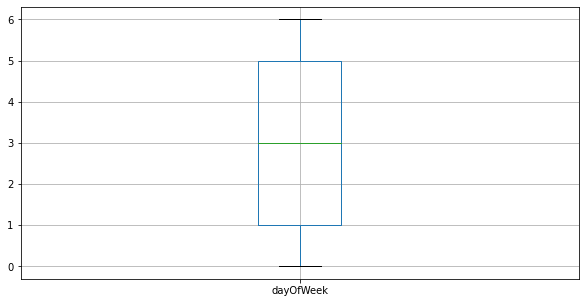

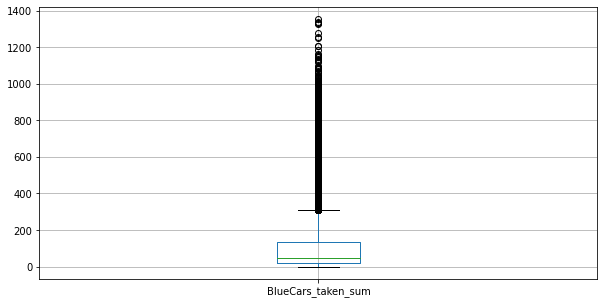

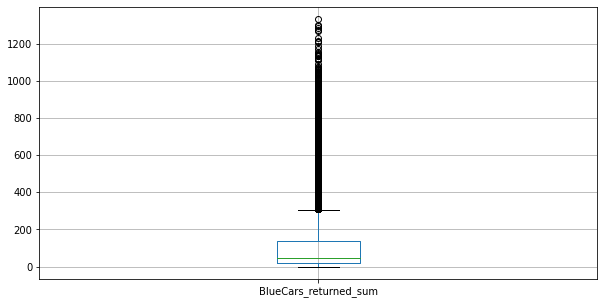

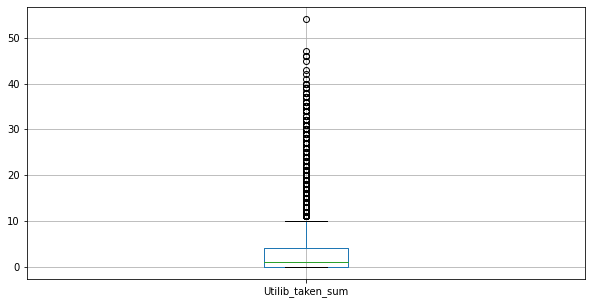

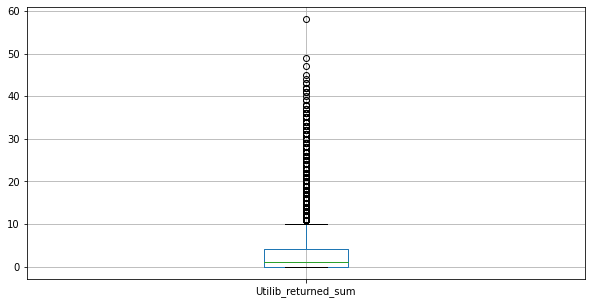

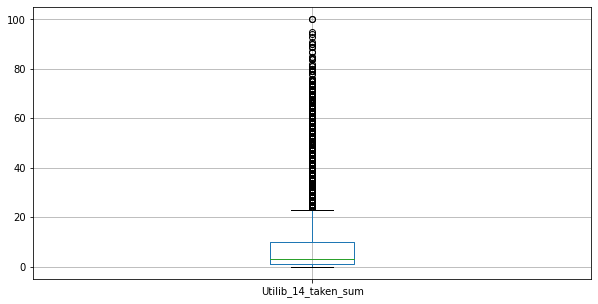

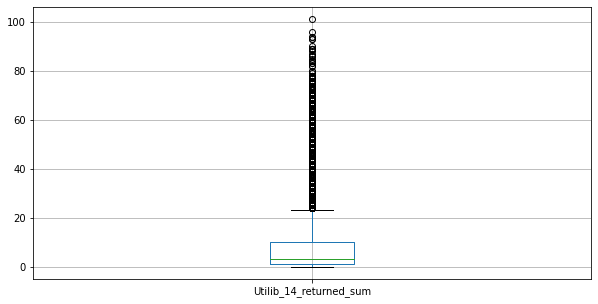

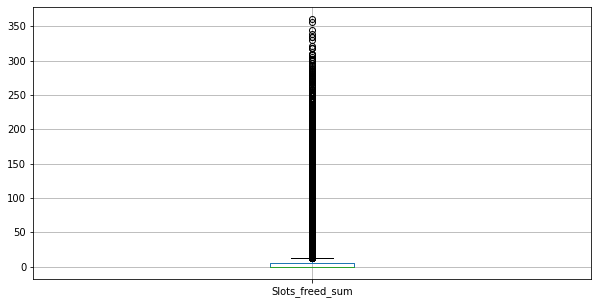

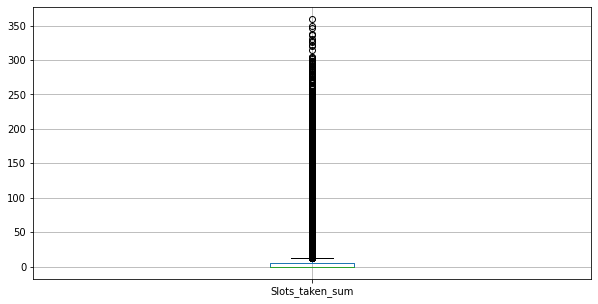

In [12]:
# Check for Outliers
# Validity of my Data Set
#create a box plot for all columns with numbers 
df_num = df.select_dtypes(include = ['float64','int64']) #create a dataframe with just numbers 
for column in df_num:
    plt.figure(figsize=(10,5))
    df_num.boxplot([column])

In [14]:
df.columns

Index(['Postal code', 'date', 'n_daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [19]:
# Checking for outliers
# checking to see if any values appear True if so they are outliers
#
Q1 = df['Slots_taken_sum'].quantile(0.25)
Q3 = df['Slots_taken_sum'].quantile(0.75)

IQR = Q3 - Q1

(df['Slots_taken_sum'] < (Q1 - 1.5 * IQR)) |(df['Slots_taken_sum'] > (Q3 + 1.5 * IQR))

# ''' Removing the Outliers '''
# df['Slots_taken_sum'].drop(Q1, inplace = True)
# df['Slots_taken_sum'].drop(Q3, inplace = True)
lower = df['Slots_taken_sum'].quantile(.05)
upper = df['Slots_taken_sum'].quantile(.95)

df['Slots_taken_sum'] = df['Slots_taken_sum'].clip(lower=lower, upper=upper)
 
print("New Shape: ", df['Slots_taken_sum'].shape)

New Shape:  (16085,)


# Univariate Plotting

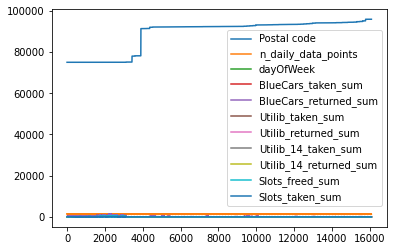

<Figure size 1440x720 with 0 Axes>

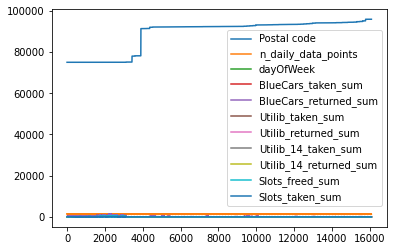

<Figure size 1440x720 with 0 Axes>

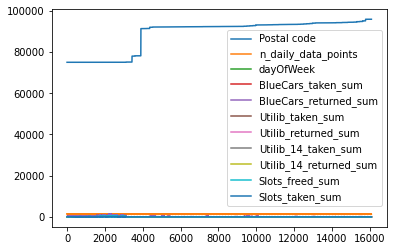

<Figure size 1440x720 with 0 Axes>

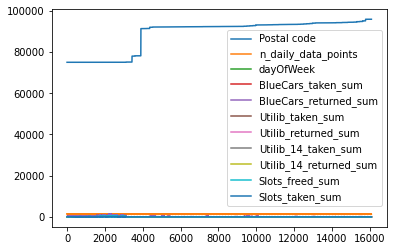

<Figure size 1440x720 with 0 Axes>

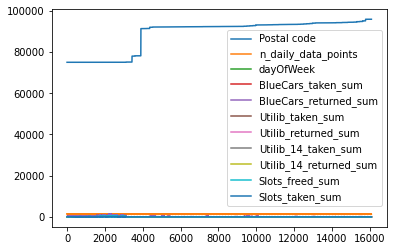

<Figure size 1440x720 with 0 Axes>

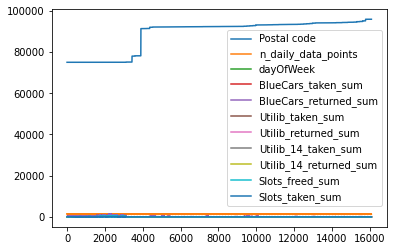

<Figure size 1440x720 with 0 Axes>

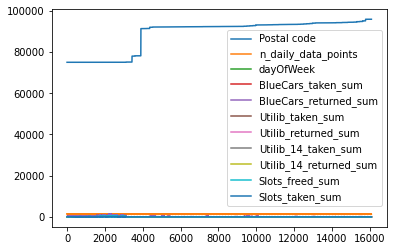

<Figure size 1440x720 with 0 Axes>

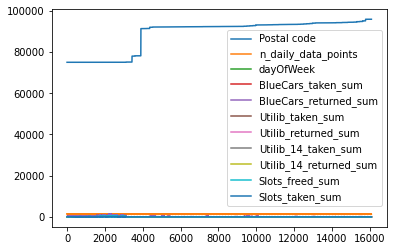

<Figure size 1440x720 with 0 Axes>

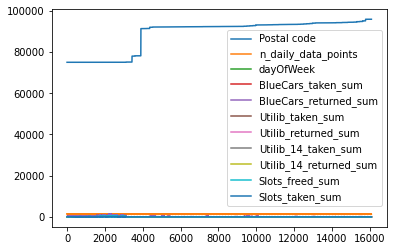

<Figure size 1440x720 with 0 Axes>

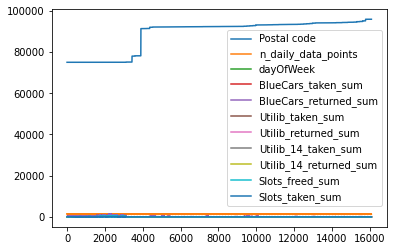

<Figure size 1440x720 with 0 Axes>

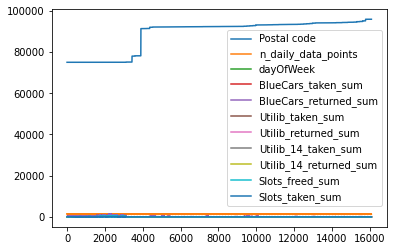

<Figure size 1440x720 with 0 Axes>

In [26]:
df_plot = df.select_dtypes(include = ['float64','int64']) #create a dataframe with just numbers 
for column in df_plot:
    df_plot.plot()
    plt.figure(figsize=(20,10))

# Displaying our graph
    plt.show()
    

# Bivariate Analysis

<AxesSubplot:>

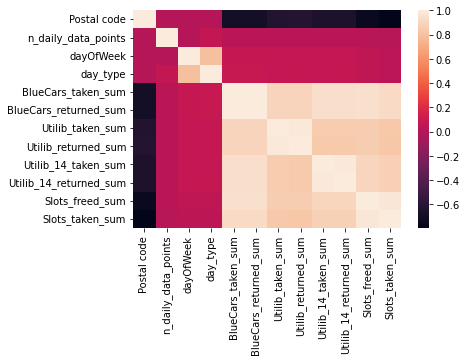

In [63]:
# Correlation Analysis

# print(df.corr())

sns.heatmap(df.corr())

# Hypothesis Testing

In [27]:
# Function to calculate the Pvalue and the Appropriate Test Statistic

def score (m1,m2,std,n):
    
    if n>30: # Calculating Z Test score
        score = (m2 - m1)/((std)/(n**0.5))
        print(f"This is the Z - Test Statistic: {score}, and this is the P-value:")
        prob = stats.norm.cdf(score)
   
    else: # Calculating T Test score
        score = (m2 - m1)/((std)/((n-1)**0.5))
        print(f"\nThis is the T - Test Statistic: {score}, and this is the P-value:")
        pro = stats.norm.cdf(score)
        prob = (1 - pro)

    # prob = stats.norm.cdf(score)
    
    return prob

In [59]:
# Function to calculate the Confidence Interval
def interval(s_mean, sizes, error):
    df_interval = df.select_dtypes(include = ['float64','int64']) #create a dataframe with just numbers 
    for column in df_interval:
        s_mean = s_mean.mean()
        sizes =  df_interval.shape[0]
        error = error.std() / np.sqrt(sizes)
# 
    stat_s = stats.norm.interval(0.95, loc=s_mean, scale=error)
    
    return stat_s



In [30]:
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,2018-01-01,1440,0,weekday,110,103,3,2,10,9,22,20.0
1,75001,2018-01-02,1438,1,weekday,98,94,1,1,8,8,23,22.0
2,75001,2018-01-03,1439,2,weekday,138,139,0,0,2,2,27,27.0
3,75001,2018-01-04,1320,3,weekday,104,104,2,2,9,8,25,21.0
4,75001,2018-01-05,1440,4,weekday,114,117,3,3,6,6,18,20.0


In [31]:
df['day_type'].unique()

array(['weekday', 'weekend'], dtype=object)

In [33]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
 
int_df = pd.DataFrame(df)
label_encoder.fit(int_df['day_type'])
 
int_df['day_type'] = label_encoder.transform(int_df['day_type'])
 
int_df.head()


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,2018-01-01,1440,0,0,110,103,3,2,10,9,22,20.0
1,75001,2018-01-02,1438,1,0,98,94,1,1,8,8,23,22.0
2,75001,2018-01-03,1439,2,0,138,139,0,0,2,2,27,27.0
3,75001,2018-01-04,1320,3,0,104,104,2,2,9,8,25,21.0
4,75001,2018-01-05,1440,4,0,114,117,3,3,6,6,18,20.0


# Point Estimators

In [73]:

population_height = stats.norm.rvs(loc=(int_df['Postal code']), scale=100, size=(int_df.shape[0]))
print ( population_height )  

# Calculate the population mean
population_height.mean()


[74798.50296045 75201.82960511 74983.42310799 ... 95858.22923757
 95854.05557832 95922.19610702]


88790.95876394633

In [66]:

sample_height = np.random.choice(a= population_height,
                               size=16085)            

# Show sample mean
print ( sample_height.mean() )                         

# calculate how much the estimated mean differs from the main mean
population_height.mean() - sample_height.mean()

0.9990657111980196


0.006636095487949745

# Interval Estimation

In [45]:
# Calculating the sample mean of final data
#
mean_1 = df['Slots_taken_sum'].mean()
print(mean_1)

# Finding the sample size
#
size = df['Slots_taken_sum'].shape[0]
print(size)

# Finding the standard error of the mean of data 
#
std_error = df['Slots_taken_sum'].std() / np.sqrt(size)
print(std_error)

print(stats.norm.interval(0.95, loc=mean_1, scale=std_error))

20.238856077090457
16085
0.3454773939114033
(19.56173282755135, 20.915979326629564)


- Conclusion
The Data research will assume a sample of data that represents the slots picked up for the vehicles between 19 and 20

# Work on the Sample Created based on the Estimated Interval

In [76]:
sample_pop = int_df[(int_df['Slots_taken_sum'] >= 19) & (int_df['Slots_taken_sum'] <= 20)]
sample_pop.head()
# sample_pop [['date', 'address','postal_code']]

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,2018-01-01,1440,0,0,110,103,3,2,10,9,22,20.0
4,75001,2018-01-05,1440,4,0,114,117,3,3,6,6,18,20.0
13,75001,2018-01-14,1440,6,1,193,193,2,2,12,12,22,20.0
15,75001,2018-01-16,1440,1,0,116,116,1,1,8,8,19,20.0
18,75001,2018-01-19,1440,4,0,130,130,3,3,7,7,17,19.0


In [77]:
sample_pop['Postal code'].unique()


array([75001, 92100, 92800])

In [83]:
sample_pop.describe()

,Postal code,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,78650.791667,1437.916667,2.916667,0.250000,146.333333,145.750000,3.708333,3.625000,8.583333,8.750000,19.458333,19.500000
std,7269.535312,8.520648,2.019829,0.442326,89.257647,87.835444,2.789408,2.856153,4.548451,5.185683,1.350657,0.510754
min,75001.000000,1398.000000,0.000000,0.000000,74.000000,80.000000,0.000000,0.000000,3.000000,3.000000,17.000000,19.000000
25%,75001.000000,1439.000000,1.000000,0.000000,102.000000,102.750000,2.000000,1.750000,5.000000,5.000000,19.000000,19.000000
50%,75001.000000,1440.000000,3.000000,0.000000,115.500000,116.500000,3.000000,3.000000,8.000000,8.000000,19.000000,19.500000
75%,75001.000000,1440.000000,4.250000,0.250000,143.250000,142.500000,4.000000,4.250000,10.250000,10.250000,20.000000,20.000000
max,92800.000000,1440.000000,6.000000,1.000000,467.000000,459.000000,12.000000,12.000000,23.000000,26.000000,22.000000,20.000000


The Post Codes from this sample that represent popular slots picked up by customers are: 
1. 75001, 
2. 92100, 
3. 92800


# Normal Distribution Plots

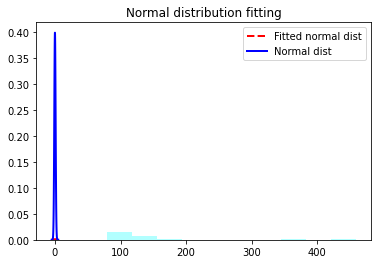

In [96]:
# Distribution fitting
# norm.fit(data) returns a list of two parameters 
# (mean, parameters[0] and std, parameters[1]) via a MLE approach 
# to data, which should be in array form.
#
parameters1 = norm.fit(sample_pop['BlueCars_returned_sum'])
# now, parameters[0] and parameters[1] are the mean and 
# the standard deviation of the fitted distribution
#
x1 = np.linspace(-5,5,100)
# Generateingthe pdf - probability density function (fitted distribution)
# 
fitted_pdf1 = norm.pdf(x1,loc = parameters1[0],scale = parameters1[1])
# Generating the pdf - probability density function (normal distribution non fitted)
# 
normal_pdf1 = norm.pdf(x1)
# Then finally displaying our plot
# 
plt.plot(x1,fitted_pdf1,"red",label="Fitted normal dist",linestyle="dashed", linewidth=2)
plt.plot(x1,normal_pdf1,"blue",label="Normal dist", linewidth=2)
plt.hist(sample_pop['BlueCars_returned_sum'], density=1,color="cyan",alpha=.3) #alpha, from 0 (transparent) to 1 (opaque)
plt.title("Normal distribution fitting") 
plt.legend() 
plt.show()

# Hypothesis Test

The sample represented by the 'Slots_taken_sum' for the slots above 19 and less than 20 is the right sample to focus on for this study.

Sample Size = 24

The Test Statistic to be used here is the T-Test as it represents a sample size less than 30.

In [98]:
# m1, m2, std, n
# Test alpha at 0.05

m1 = sample_pop['BlueCars_returned_sum'].mean()
m2 = int_df['BlueCars_returned_sum'].mean()
std = sample_pop['BlueCars_returned_sum'].std()
n = sample_pop.shape[0]

score (m1,m2,std,n)


This is the T - Test Statistic: -1.0831195088705863, and this is the P-value:


0.860622309638249

We fail to reject the P-Value at both instances; where alpha is at 10% or 5%